In [82]:
# importing pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import csv
import os
import numpy as np

In [83]:
# path to the client-hello-cipher-suites.csv file
# file_path = '../../../results/attributes/DNS/NEW_dns_transID_response_attributes.csv'
file_path_transmit_response = '../../../results/attributes/NTP/NEW_ntp_transmit_response_attributes.csv'
file_path_transmit_request = '../../../results/attributes/NTP/NEW_ntp_transmit_request_attributes.csv'

file_path_origin_response = '../../../results/attributes/NTP/NEW_ntp_origin_response_attributes.csv'
file_path_origin_request = '../../../results/attributes/NTP/NEW_ntp_origin_request_attributes.csv'

# path to the directory to save the plots
final_output_dir = '../../../results/attributes/NTP/transmitTS_plots'

In [84]:
# df = pd.read_csv(file_path, sep='|')
# df.head()

In [85]:
import csv
csv.field_size_limit(10 * 1024 * 1024)

# Read the CSV file and extract data
device_transmit_request = {}
with open(file_path_transmit_request, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for i, row in enumerate(csvreader):
        # print(row)
        if i == 0:
            continue
        device = row[0].split('|')[0]
        # print(f'device: {device}')
        transIDs = row[0].split('|')[1].split('__')[1:]

        device_transmit_request[device] = transIDs


for k, v in device_transmit_request.items():
    print(f'key: {k}, value: {v}')


device_transmit_response = {}
with open(file_path_transmit_response, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for i, row in enumerate(csvreader):
        # print(row)
        if i == 0:
            continue
        device = row[0].split('|')[0]
        # print(f'device: {device}')
        transIDs = row[0].split('|')[1].split('__')[1:]

        device_transmit_response[device] = transIDs


for k, v in device_transmit_response.items():
    print(f'key: {k}, value: {v}')





device_origin_response = {}
with open(file_path_origin_response, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for i, row in enumerate(csvreader):
        # print(row)
        if i == 0:
            continue
        device = row[0].split('|')[0]
        # print(f'device: {device}')
        transIDs = row[0].split('|')[1].split('__')[1:]

        device_origin_response[device] = transIDs


for k, v in device_origin_response.items():
    print(f'key: {k}, value: {v}')


device_origin_request = {}
with open(file_path_origin_request, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for i, row in enumerate(csvreader):
        # print(row)
        if i == 0:
            continue
        device = row[0].split('|')[0]
        # print(f'device: {device}')
        transIDs = row[0].split('|')[1].split('__')[1:]

        device_origin_request[device] = transIDs


for k, v in device_origin_request.items():
    print(f'key: {k}, value: {v}')
# # Create a dictionary to store qnumbers for each device
# device_qnumbers = {}
# for i, device_list in enumerate(devices):
#     for j, device in enumerate(device_list):
#         qnumber_dict = qnumber_dicts[i][j]
#         transaction_id = qnumber_dict['transaction id']
#         qnumbers = list(qnumber_dict.keys())
#         qnumbers.remove('transaction id')
        
#         if device not in device_qnumbers:
#             device_qnumbers[device] = []
#         device_qnumbers[device].extend(qnumbers)

# # Print the resulting dictionary
# for device, qnumbers in device_qnumbers.items():
#     print(f"Device: {device}, Qnumbers: {qnumbers}")


key: AwairAirQuality, value: ['dbd5ba4300000000', 'dbd8796600000000', 'dbe71a8900000000', 'dbcf7c1900000000', 'dbdbe6eb00000000', 'dbec599600000000', 'dbd5c85800000000', 'dbe309e400000000', 'dbdb05ea00000000', 'dbdcabcc00000000', '83aa7e8300000000', 'dc62228f00000000', 'dbe4e80700000000', 'dbeac1c400000000', 'dbe1b86300000000', 'dbe1feb300000000', 'dbd2deff00000000', 'dbcf51e900000000', 'dbe6fe6900000000', 'dbd67f2400000000', 'dbcfeb9e00000000', 'dbcfc16e00000000', 'dbe009e900000000', 'dbdaa37f00000000', 'dbe44d5600000000', 'dbe0f38200000000', 'dbe590c700000000', 'dbdd548d00000000', 'dbd2566100000000', 'dbd023de00000000', 'dbdb5a4a00000000', 'dbe8c06b00000000', 'dbee61e900000000', 'dbcfdd9300000000', 'dbdabf9a00000000', 'dbde9c4700000000', 'dbcff9ae00000000', 'dbe582b700000000', '83aa7e8a00000000', 'dc62a12100000000', 'dbdf7d4800000000', 'dbe2531300000000', 'dbdb4c3a00000000', 'dbdc111b00000000', 'dbed64c800000000', 'dbdd1c4d00000000', 'dbd53bb200000000', 'dbe07a6900000000', 'dbcf8a2e0

## Data Pre-Processing

In [86]:
def hex_to_decimal(hex_number):
    try:
        decimal_number = int(hex_number, 16)
        return decimal_number
    except ValueError:
        raise ValueError("Invalid hexadecimal number")

In [87]:
import struct
from datetime import datetime, timedelta

def hex_to_ntp_timestamp(hex_timestamp):
    # Convert the hexadecimal string to a 64-bit integer
    ntp_int = int(hex_timestamp, 16)
    
    # Calculate seconds and fractional seconds
    seconds = ntp_int >> 32
    fractional = ntp_int & 0xFFFFFFFF
    
    # Convert to datetime
    ntp_epoch = datetime(1900, 1, 1)
    ntp_time = ntp_epoch + timedelta(seconds=seconds, microseconds=(fractional * 1e6 / 0xFFFFFFFF))
    
    return ntp_time




In [88]:
for device, transID_list in device_transmit_request.items():
    print(f'device: {device}')
    newList = []
    for i, transID in enumerate(transID_list):
        if transID == 'None' or transID == 'nan': continue
        print(f'i: {i}, transID: {transID}')
        # for ci, c in enumerate(cs):
        dec_val = hex_to_ntp_timestamp(transID)
        # print(f'hex_val: {dec_val}')
        # cs[ci] = hex_val
        # transID_list[i] = math.log2(dec_val)
        # transID_list[i] = dec_val
        print(type(dec_val))
            
        # newList.append(new_val)  
        newList.append(dec_val)  
    
    device_transmit_request[device] = sorted(newList)


for device, transID_list in device_transmit_response.items():
    print(f'device: {device}')
    newList = []
    for i, transID in enumerate(transID_list):
        if transID == 'None' or transID == 'nan': continue
        print(f'i: {i}, transID: {transID}')
        # for ci, c in enumerate(cs):
        dec_val = hex_to_ntp_timestamp(transID)
        # print(f'hex_val: {dec_val}')
        # cs[ci] = hex_val
        # transID_list[i] = math.log2(dec_val)
        # transID_list[i] = dec_val
        print(type(dec_val))
            
        # newList.append(new_val)  
        newList.append(dec_val)  
    
    device_transmit_response[device] = sorted(newList)


for device, transID_list in device_origin_response.items():
    print(f'device: {device}')
    newList = []
    for i, transID in enumerate(transID_list):
        if transID == 'None' or transID == 'nan': continue
        print(f'i: {i}, transID: {transID}')
        # for ci, c in enumerate(cs):
        dec_val = hex_to_ntp_timestamp(transID)
        # print(f'hex_val: {dec_val}')
        # cs[ci] = hex_val
        # transID_list[i] = math.log2(dec_val)
        # transID_list[i] = dec_val
        print(type(dec_val))
            
        # newList.append(new_val)  
        newList.append(dec_val)  
    
    device_origin_response[device] = sorted(newList)

for device, transID_list in device_origin_request.items():
    print(f'device: {device}')
    newList = []
    for i, transID in enumerate(transID_list):
        if transID == 'None' or transID == 'nan': continue
        print(f'i: {i}, transID: {transID}')
        # for ci, c in enumerate(cs):
        dec_val = hex_to_ntp_timestamp(transID)
        # print(f'hex_val: {dec_val}')
        # cs[ci] = hex_val
        # transID_list[i] = math.log2(dec_val)
        # transID_list[i] = dec_val
        print(type(dec_val))
            
        # newList.append(new_val)  
        newList.append(dec_val)  
    
    device_origin_request[device] = sorted(newList)

# # Example hex transmit timestamp
# hex_timestamp = "dbd5ba43cb47498b"  # Replace with your hex value

# ntp_time = hex_to_ntp_timestamp(hex_timestamp)
# print("NTP Time:", ntp_time)

device: AwairAirQuality
i: 0, transID: dbd5ba4300000000
<class 'datetime.datetime'>
i: 1, transID: dbd8796600000000
<class 'datetime.datetime'>
i: 2, transID: dbe71a8900000000
<class 'datetime.datetime'>
i: 3, transID: dbcf7c1900000000
<class 'datetime.datetime'>
i: 4, transID: dbdbe6eb00000000
<class 'datetime.datetime'>
i: 5, transID: dbec599600000000
<class 'datetime.datetime'>
i: 6, transID: dbd5c85800000000
<class 'datetime.datetime'>
i: 7, transID: dbe309e400000000
<class 'datetime.datetime'>
i: 8, transID: dbdb05ea00000000
<class 'datetime.datetime'>
i: 9, transID: dbdcabcc00000000
<class 'datetime.datetime'>
i: 10, transID: 83aa7e8300000000
<class 'datetime.datetime'>
i: 11, transID: dc62228f00000000
<class 'datetime.datetime'>
i: 12, transID: dbe4e80700000000
<class 'datetime.datetime'>
i: 13, transID: dbeac1c400000000
<class 'datetime.datetime'>
i: 14, transID: dbe1b86300000000
<class 'datetime.datetime'>
i: 15, transID: dbe1feb300000000
<class 'datetime.datetime'>
i: 16, tra

<class 'datetime.datetime'>
i: 11532, transID: 01a919a1445fd180
<class 'datetime.datetime'>
i: 11533, transID: b657a5b91a480fb6
<class 'datetime.datetime'>
i: 11534, transID: 106e134caa75e3fe
<class 'datetime.datetime'>
i: 11535, transID: ccc3bf3e3ae2ef71
<class 'datetime.datetime'>
i: 11536, transID: 51d061968103bf2a
<class 'datetime.datetime'>
i: 11537, transID: 27031d660b259868
<class 'datetime.datetime'>
i: 11538, transID: 2b9b2310fd4c1aaf
<class 'datetime.datetime'>
i: 11539, transID: 97e7d15eb094db5d
<class 'datetime.datetime'>
i: 11540, transID: 323e717c95b46a90
<class 'datetime.datetime'>
i: 11541, transID: 81328ae320931fb4
<class 'datetime.datetime'>
i: 11542, transID: 434f16c5a7897937
<class 'datetime.datetime'>
i: 11543, transID: 6cd6711741c6214b
<class 'datetime.datetime'>
i: 11544, transID: fc55a9df0789f420
<class 'datetime.datetime'>
i: 11545, transID: c51c5e4fca7c2b06
<class 'datetime.datetime'>
i: 11546, transID: a0bfdbcce32cb52b
<class 'datetime.datetime'>
i: 11547, tr

In [89]:
# for k, v in device_transID.items():
#     print(f'key: {k}, value: {v}')

## Plotting

In [90]:
def plot_list_as_line_plt(transReq, oriRes, save_name):
    x_values = 0
    # for i, cs in enumerate(lst2D):
    # if len(cs) <= 1:
        # print(f'case')
        # continue
        # return
    x_values = list(range(len(transReq)))  # Use list indices as x-axis
    x_values = [x + 1 for x in x_values]
    y1_values = transReq  # Use list items as y-axis
    y2_values = oriRes  # Use list items as y-axis
    
    # general config for plots with more than 1 graph
    # if i==0:
    #     linstl = '-'
    #     mkr = 'o'
    #     clr = 'b'
    # if i==1:
    #     linstl = ':'
    #     mkr = '*'
    #     clr = 'y'
        
    # # specific configs for required devices
    # if save_name == 'LiFXBulb':  # LiFXBulb
    #     linstl = '--'
    #     mkr = '^'
    #     clr = 'c'
    # elif save_name == 'TPLinkCamera':  # TPLinkCamera
    #     linstl = '-.'
    #     mkr = 'x'
    #     clr = 'r'

    linstl = '-'
    mkr = '.'
    clr = 'b'
    # plt.plot(x_values, y_values, marker=mkr, linestyle=linstl, color=clr)
    plt.scatter(x_values, y1_values, color=clr, marker=mkr, label='Data Points')
    plt.scatter(x_values, y2_values, color='r', marker=mkr, label='Data Points')

    plt.xlabel('Index of the offered list')
    plt.ylabel('Decimal equivalent of the hex code')
    # plt.title('Line Plot from List')
    plt.grid(True)

    x_values = np.array(x_values)
    even_xticks = x_values[x_values % 50 == 0]  # to get the x-axis grid lines
    # plt.xticks(even_xticks)
    
    # if len(x_values) <= 25:
    #     plt.xticks(range(len(x_values)), [int(x) for x in x_values])
    # elif len(x_values) <= 50:
    #     x_values = np.array(x_values)
    #     even_xticks = x_values[x_values % 2 == 0]  # to get the x-axis grid lines
    #     plt.xticks(even_xticks)
    # elif len(x_values) <= 75:
    #     x_values = np.array(x_values)
    #     even_xticks = x_values[x_values % 3 == 0]  # to get the x-axis grid lines
    #     plt.xticks(even_xticks)
    # elif len(x_values) <= 100:
    #     x_values = np.array(x_values)
    #     even_xticks = x_values[x_values % 5 == 0]  # to get the x-axis grid lines
    #     plt.xticks(even_xticks)

    plt.savefig(os.path.join(final_output_dir, save_name), format='pdf')  # save
    plt.show()

# def plot_list_as_line_sns(lst2D, save_name):
#     x_values = list(range(len(lst)))  # Use list indices as x-axis
#     y_values = lst  # Use list items as y-axis

#     sns.lineplot(x=x_values, y=y_values, marker='o', color='b')
#     plt.xlabel('Index')
#     plt.ylabel('Value')
#     plt.title('Line Plot from List')
#     plt.grid(True)

#     plt.savefig(os.path.join(final_output_dir, save_name), format='pdf')  # save
#     plt.show()


device_name: AwairAirQuality


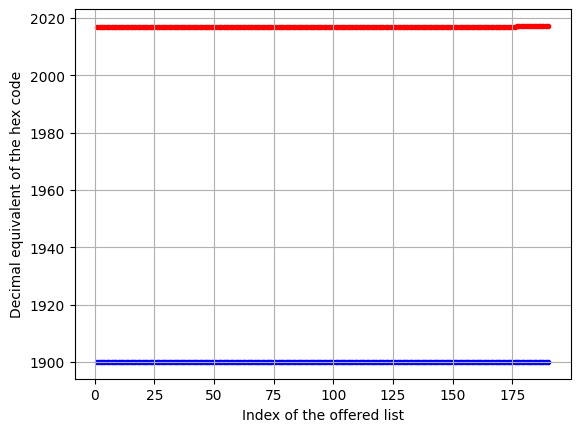

device_name: LiFXBulb


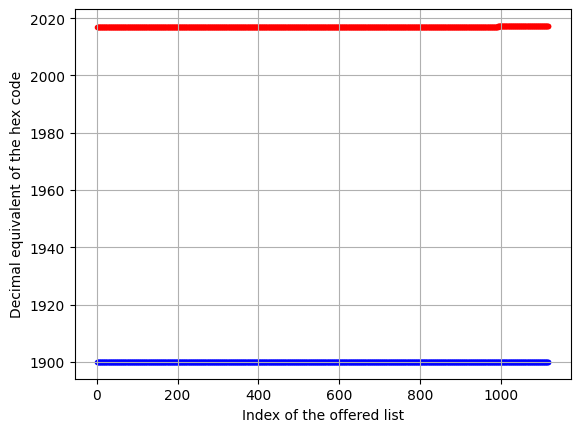

device_name: PixStarPhotoFrame


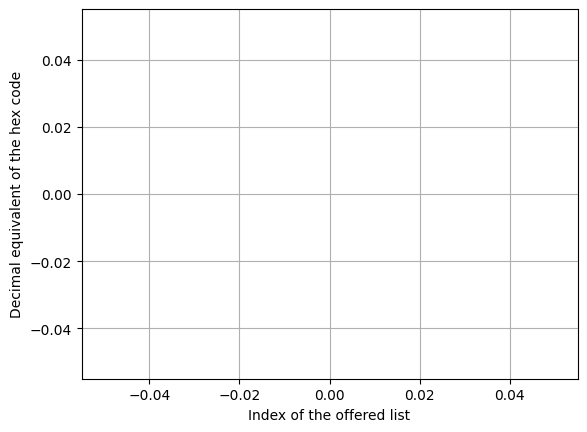

device_name: RingDoorBell


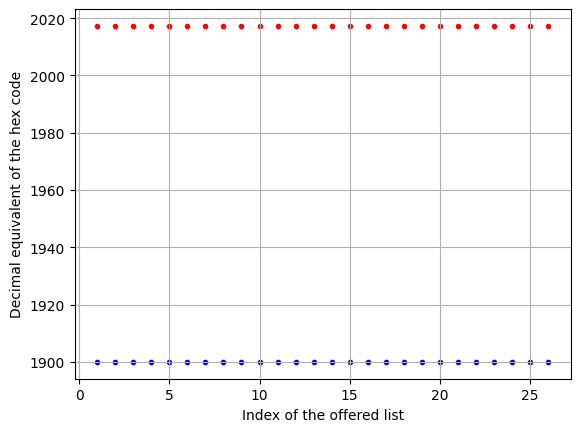

device_name: TPLinkCamera


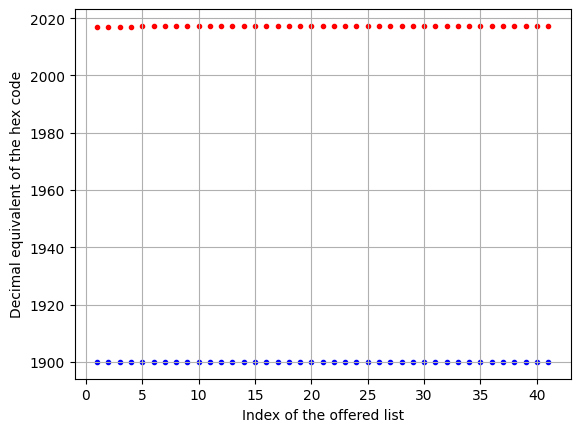

device_name: TribySpeaker


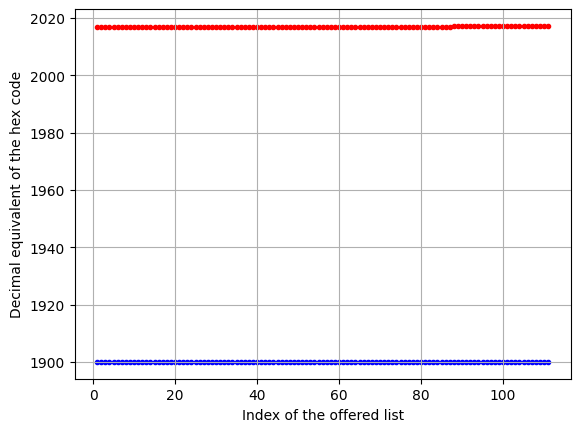

device_name: AmazonEcho


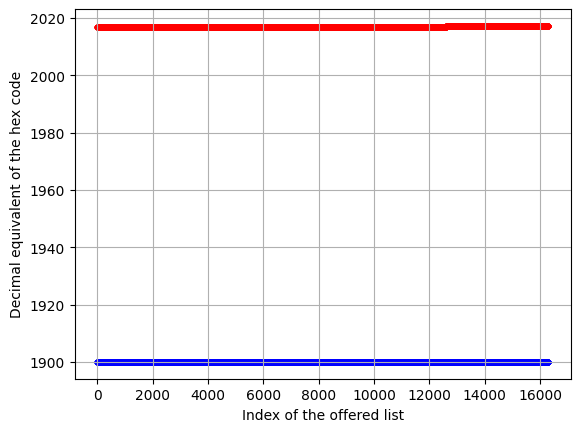

device_name: WithingsSleepSensor


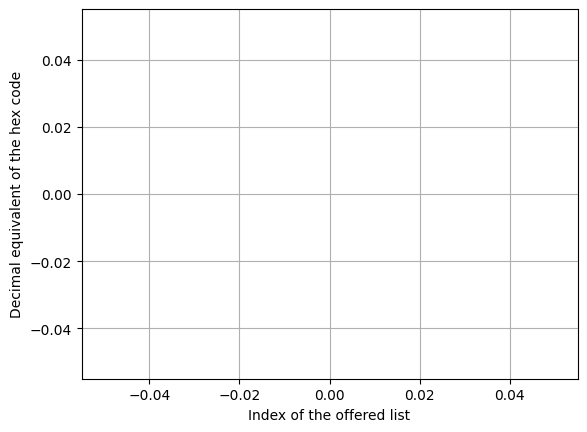

device_name: SamsungCamera


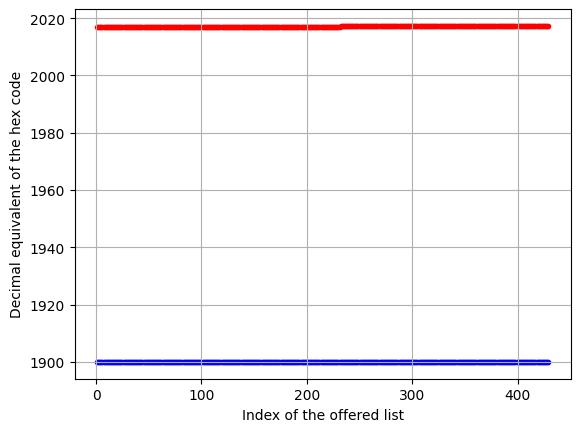

device_name: WithingsBabyMonitor


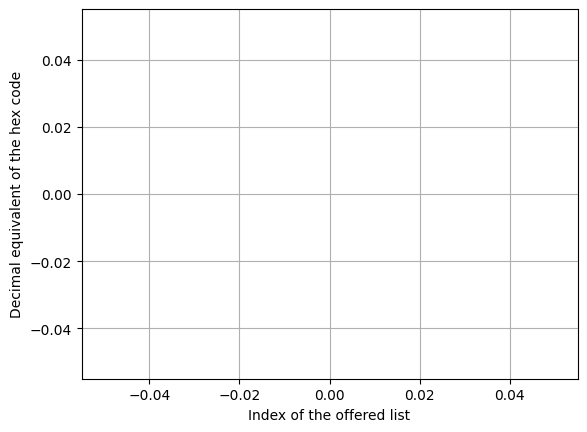

In [91]:
# plot_list_as_line_plt(dict01['AwairAirQuality'][0])
# plot_list_as_line_sns(dict01['AwairAirQuality'][0])
printed_devices = []
for device, css in device_origin_request.items():
    device_name = device
    # if '/' in device:
    #     device_name = device.split('/')[0]

    # if device_name in printed_devices:
    #     continue  
    print(f'device_name: {device_name}')
    plot_list_as_line_plt(css, device_transmit_response[device], device_name)
    printed_devices.append(device_name)
    # if len(css) < 1:
    #     print(f'device: {device} has 0 ciphersuites')
    #     continue
    # for csi, cs in enumerate(css):
    #     if len(cs) <= 1:
    #         print(f'device: {device}, cs: {csi} has 0 ciphers')
    #         continue
    #     if device_name in printed_devices:
    #         continue
    #     plot_list_as_line_plt(cs, device_name)
    #     printed_devices.append(device_name)